In [1]:
print("This exercise uses a RFM (Recency, Frequency, Monetary) analysis on a dataset containing transactions made by customers of a UK-based online retail company. I wanted to perform a k means clustering analyis to segment customers into different groups based on their buying patterns.")

This exercise uses a RFM (Recency, Frequency, Monetary) analysis on a dataset containing transactions made by customers of a UK-based online retail company. I wanted to perform a k means clustering analyis to segment customers into different groups based on their buying patterns.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_excel(r"C:\Users\camwa\OneDrive\Datasets\Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Filter out canceled orders and rows with missing values
df = df[df['Quantity'] > 0]
df.dropna(subset=['CustomerID'], inplace=True)

In [5]:
# Aggregate data to customer level for RFM analysis (Recency, Frequency, Monetary)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] # A 'TotalPrice' column is created to represent the total monetary value of each transaction in the dataset
rfm = df.groupby('CustomerID').agg({ #Aggregates the transactional data to the customer level by grouping it based on CustomerID
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days, #The Recency column is created to measure the number of days between the latest purchase and the most recent purchase of each customer
    'InvoiceNo': 'nunique', #The Frequency column is determined by the number of unique purchases made by each customer
    'TotalPrice': 'sum' #The Monetary column is obtained by summing the TotalPrice for each customer.
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [6]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [7]:
# Standardizing the data
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [8]:
# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_rfm)
rfm['Cluster'] = kmeans.labels_

In [9]:
rfm['Cluster'].value_counts()

Cluster
0    3231
1    1082
2      26
Name: count, dtype: int64

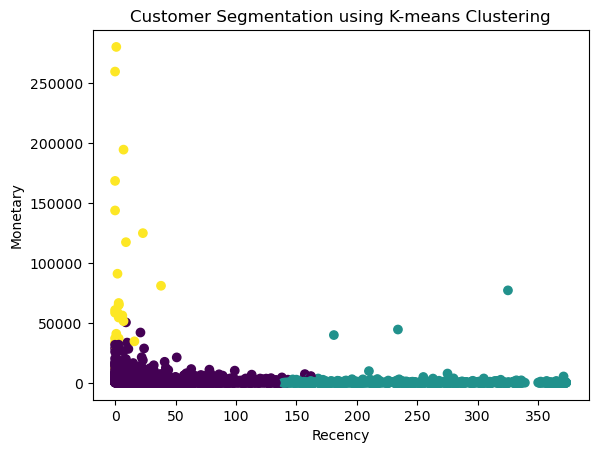

In [10]:
# Visualizing the clusters
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

In [11]:
from sklearn.cluster import KMeans

#Creating an empty list to store inertia values (within-cluster sum of squares)
inertia_values = []

In [12]:
#Running K-means for a range of K values
for k in range(1, 40):  # Trying K values from 1 to 40
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_rfm)
    inertia_values.append(kmeans.inertia_)

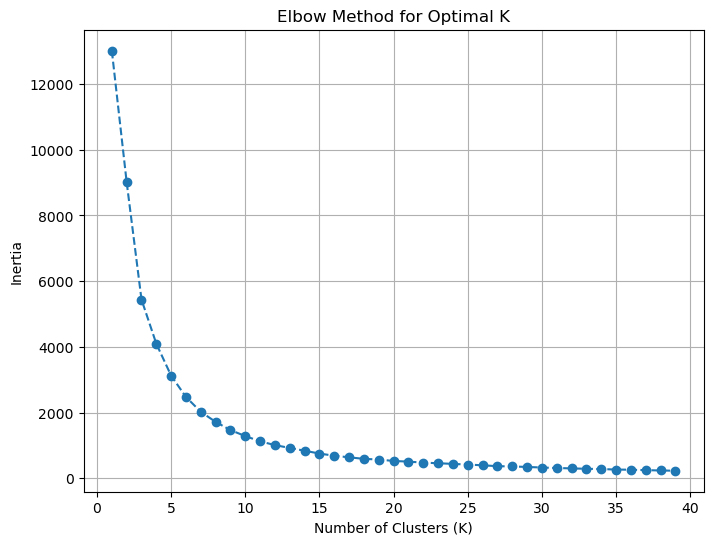

In [13]:
#Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 40), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [14]:
print('It doesn\'t seem as though this model successfully classified the data into usable clusters. By incorporating more relevant features, transforming existing features, or refining the selection process, more distinctive clusters that better capture underlying patterns in the data can be created.')

It doesn't seem as though this model successfully classified the data into usable clusters. By incorporating more relevant features, transforming existing features, or refining the selection process, more distinctive clusters that better capture underlying patterns in the data can be created.
